In [ ]:
import numpy as np
import pandas as pd
import scipy
import seaborn as sns
import spacy
import sklearn as sk
import gensim

/usr/local/lib/python3.8/dist-packages/torch/cuda/__init__.py:497: UserWarning: Can't initialize NVML
  warnings.warn("Can't initialize NVML")


In [ ]:
from top2vec import Top2Vec

In [ ]:
dir = '../data'

In [ ]:
tokenize = lambda d: gensim.utils.simple_preprocess( gensim.parsing.preprocessing.strip_tags( d ), deacc=True )

# load data

In [ ]:
train_dfs = [ pd.read_csv( f'{dir}/nlpdata-train-{i}.csv', encoding='utf8' ) for i in range( 5 ) ]
print( train_dfs[ 0 ].shape )
train_dfs[ 0 ].head()

(742, 9)


,Page,URL,Topic,Question,Answer,Label,qid,tpc_id,lbl_id
0,Innovative finance COP27,https://qutii.org/index.php/Innovative_finance...,climate change,What's the evidence that climate finance suppo...,Even though richer nations agreed to channel $...,p,0,0,0
1,Innovative finance COP27,https://qutii.org/index.php/Innovative_finance...,climate change,How much needs the climate finance flows to in...,the climate finance flows still need to be inc...,p,1,0,0
2,Innovative finance COP27,https://qutii.org/index.php/Innovative_finance...,climate change,What's the real growth of climate finance flow...,Climate finance flows have grown by ~5% from 2...,a,2,0,1
3,Innovative finance COP27,https://qutii.org/index.php/Innovative_finance...,climate change,Why mobilization of the $100bn per year by 202...,"According to OECD, only $83bn were channelled ...",s,3,0,2
4,Innovative finance COP27,https://qutii.org/index.php/Innovative_finance...,climate change,What's the evidence that voluntary carbon mark...,The global size of voluntary carbon markets (o...,a,4,0,1


In [ ]:
test_dfs = [ pd.read_csv( f'{dir}/nlpdata-test-{i}.csv', encoding='utf8' ) for i in range( 5 ) ]
print( test_dfs[ 0 ].shape )
test_dfs[ 0 ].head()

(185, 9)


,Page,URL,Topic,Question,Answer,Label,qid,tpc_id,lbl_id
0,Innovative finance COP27,https://qutii.org/index.php/Innovative_finance...,climate change,What shall solutions focus on to assist develo...,Solutions identified shall ultimately assist d...,s,7,0,2
1,Innovative finance COP27,https://qutii.org/index.php/Innovative_finance...,climate change,What's the evidence that the issuance of Envir...,the first EIB was issued in 2016 by Quantified...,a,9,0,1
2,Innovative finance COP27,https://qutii.org/index.php/Innovative_finance...,climate change,Which are the roadblocks that hinder the globa...,"- The limited availability of at-scale, bankab...",s,13,0,2
3,Innovative finance COP27,https://qutii.org/index.php/Innovative_finance...,climate change,Which are the roadblocks that hinder the globa...,-The absence of a global standardized policy f...,s,13,0,2
4,Innovative finance COP27,https://qutii.org/index.php/Innovative_finance...,climate change,In which type of project is used climate fundi...,The fundings have been primarily used to fund ...,a,17,0,1


In [ ]:
# import sklearn.datasets
# news = sk.datasets.fetch_20newsgroups()
# train_df = pd.DataFrame( news.data, columns=[ 'tokens' ] )
# train_df.head()

In [ ]:
# t = train_df.copy()
# t[ 'tokens' ] = t.tokens.str.replace( r'From.*\n', '' )
# t[ 'tokens' ] = t.tokens.str.replace( r'Subject: *Re: *', '' )
# t[ 'tokens' ] = t.tokens.str.replace( r'Subject: *', '' )
# t[ 'tokens' ] = t.tokens.str.replace( r'Nntp-Posting-Host.*\n', '', re.IGNORECASE )
# t[ 'tokens' ] = t.tokens.str.replace( r'Organization.*\n', '' )
# t[ 'tokens' ] = t.tokens.str.replace( r'Lines.*\n', '' )
# # t[ 'tokens' ] = t.tokens.str.replace( r'\n', ' ' )
# t.head()

# preprocess (without lemmatization)

In [ ]:
for train_df, test_df in zip( train_dfs, test_dfs ):
    for df in [ train_df, test_df ]:
        df[ 'text' ] = df.Question + ' ' + df.Answer.str.replace( r'\[[0-9]*\]', '' )

In [ ]:
# train_df[ 'tokens' ] = train_df.Question + ' ' + train_df.Answer
# test_df[ 'tokens' ] = test_df.Question + ' ' + test_df.Answer
# train_df[ 'tokens' ] = train_df.Page + ' ' + train_df.Question + ' ' + train_df.Answer
# test_df[ 'tokens' ] = test_df.Page + ' ' + test_df.Question + ' ' + test_df.Answer

In [ ]:
train_dfs[ 0 ].head()

,Page,URL,Topic,Question,Answer,Label,qid,tpc_id,lbl_id,text
0,Innovative finance COP27,https://qutii.org/index.php/Innovative_finance...,climate change,What's the evidence that climate finance suppo...,Even though richer nations agreed to channel $...,p,0,0,0,What's the evidence that climate finance suppo...
1,Innovative finance COP27,https://qutii.org/index.php/Innovative_finance...,climate change,How much needs the climate finance flows to in...,the climate finance flows still need to be inc...,p,1,0,0,How much needs the climate finance flows to in...
2,Innovative finance COP27,https://qutii.org/index.php/Innovative_finance...,climate change,What's the real growth of climate finance flow...,Climate finance flows have grown by ~5% from 2...,a,2,0,1,What's the real growth of climate finance flow...
3,Innovative finance COP27,https://qutii.org/index.php/Innovative_finance...,climate change,Why mobilization of the $100bn per year by 202...,"According to OECD, only $83bn were channelled ...",s,3,0,2,Why mobilization of the $100bn per year by 202...
4,Innovative finance COP27,https://qutii.org/index.php/Innovative_finance...,climate change,What's the evidence that voluntary carbon mark...,The global size of voluntary carbon markets (o...,a,4,0,1,What's the evidence that voluntary carbon mark...


In [ ]:
test_dfs[ 0 ].head()

,Page,URL,Topic,Question,Answer,Label,qid,tpc_id,lbl_id,text
0,Innovative finance COP27,https://qutii.org/index.php/Innovative_finance...,climate change,What shall solutions focus on to assist develo...,Solutions identified shall ultimately assist d...,s,7,0,2,What shall solutions focus on to assist develo...
1,Innovative finance COP27,https://qutii.org/index.php/Innovative_finance...,climate change,What's the evidence that the issuance of Envir...,the first EIB was issued in 2016 by Quantified...,a,9,0,1,What's the evidence that the issuance of Envir...
2,Innovative finance COP27,https://qutii.org/index.php/Innovative_finance...,climate change,Which are the roadblocks that hinder the globa...,"- The limited availability of at-scale, bankab...",s,13,0,2,Which are the roadblocks that hinder the globa...
3,Innovative finance COP27,https://qutii.org/index.php/Innovative_finance...,climate change,Which are the roadblocks that hinder the globa...,-The absence of a global standardized policy f...,s,13,0,2,Which are the roadblocks that hinder the globa...
4,Innovative finance COP27,https://qutii.org/index.php/Innovative_finance...,climate change,In which type of project is used climate fundi...,The fundings have been primarily used to fund ...,a,17,0,1,In which type of project is used climate fundi...


# train topic models

In [ ]:
def train_distiluse( df ):
  docs = df.text.to_list()
  # train topic model
  m = Top2Vec(
    docs,
    embedding_model='distiluse-base-multilingual-cased',
    use_embedding_model_tokenizer=True,
    min_count=1,
    verbose=False,
  )
  print( f'\t#topics: {m.get_num_topics()}' )
  # calculate coherence score
  tokenized_docs = [ tokenize( d ) for d in docs ]
  dictionary = gensim.corpora.Dictionary( tokenized_docs )
  return gensim.models.CoherenceModel(
    topics=[ m.get_topics( i )[ 0 ][ 0 ] for i in range( m.get_num_topics() ) if len( m.get_topics( i )[ 0 ] ) > 0 ],
    corpus=[ dictionary.doc2bow( doc ) for doc in tokenized_docs ],
    dictionary=dictionary,
    texts=tokenized_docs,
    coherence='c_v',
  ).get_coherence()

In [ ]:
topic = 'climate change'
scores = [ train_distiluse( train_df[ train_df.Topic == topic ] ) for train_df in train_dfs ]
np.mean( scores ), np.var( scores ), scores

2023-02-11 23:02:21,283 - top2vec - INFO - Downloading distiluse-base-multilingual-cased model
INFO:top2vec:Downloading distiluse-base-multilingual-cased model


	#topics: 6


2023-02-11 23:03:43,359 - top2vec - INFO - Downloading distiluse-base-multilingual-cased model
INFO:top2vec:Downloading distiluse-base-multilingual-cased model


	#topics: 6


2023-02-11 23:04:51,014 - top2vec - INFO - Downloading distiluse-base-multilingual-cased model
INFO:top2vec:Downloading distiluse-base-multilingual-cased model


	#topics: 6


2023-02-11 23:05:58,741 - top2vec - INFO - Downloading distiluse-base-multilingual-cased model
INFO:top2vec:Downloading distiluse-base-multilingual-cased model


	#topics: 7


2023-02-11 23:06:53,662 - top2vec - INFO - Downloading distiluse-base-multilingual-cased model
INFO:top2vec:Downloading distiluse-base-multilingual-cased model


	#topics: 3


(0.6632806079495899,
 0.00024439796111790546,
 [0.6890239414819772,
  0.6476235967847195,
  0.6561426588829797,
  0.6504303100089232,
  0.67318253258935])

In [ ]:
def train_minilm( df ):
  docs = df.text.to_list()
  # train topic model
  m = Top2Vec(
    docs,
    embedding_model='all-MiniLM-L6-v2',
    use_embedding_model_tokenizer=True,
    min_count=1,
    verbose=False,
  )
  print( f'\t#topics: {m.get_num_topics()}' )
  # calculate coherence score
  tokenized_docs = [ tokenize( d ) for d in docs ]
  dictionary = gensim.corpora.Dictionary( tokenized_docs )
  return gensim.models.CoherenceModel(
    topics=[ m.get_topics( i )[ 0 ][ 0 ] for i in range( m.get_num_topics() ) if len( m.get_topics( i )[ 0 ] ) > 0 ],
    corpus=[ dictionary.doc2bow( doc ) for doc in tokenized_docs ],
    dictionary=dictionary,
    texts=tokenized_docs,
    coherence='c_v',
  ).get_coherence()

In [ ]:
topic = 'climate change'
scores = [ train_minilm( train_df[ train_df.Topic == topic ] ) for train_df in train_dfs ]
np.mean( scores ), np.var( scores ), scores

2023-02-11 23:08:08,778 - top2vec - INFO - Downloading all-MiniLM-L6-v2 model
INFO:top2vec:Downloading all-MiniLM-L6-v2 model


	#topics: 4


2023-02-11 23:08:31,799 - top2vec - INFO - Downloading all-MiniLM-L6-v2 model
INFO:top2vec:Downloading all-MiniLM-L6-v2 model


	#topics: 5


2023-02-11 23:08:56,502 - top2vec - INFO - Downloading all-MiniLM-L6-v2 model
INFO:top2vec:Downloading all-MiniLM-L6-v2 model


	#topics: 6


2023-02-11 23:09:18,652 - top2vec - INFO - Downloading all-MiniLM-L6-v2 model
INFO:top2vec:Downloading all-MiniLM-L6-v2 model


	#topics: 3


2023-02-11 23:09:38,572 - top2vec - INFO - Downloading all-MiniLM-L6-v2 model
INFO:top2vec:Downloading all-MiniLM-L6-v2 model


	#topics: 7


(0.6811047079641347,
 0.0009335266339738059,
 [0.6811608619031823,
  0.7260993820692645,
  0.6554612879674573,
  0.7013776664138012,
  0.6414243414669686])

In [ ]:
def train_sentence_encoder( df ):
  docs = df.text.to_list()
  # train topic model
  m = Top2Vec(
    docs,
    embedding_model='universal-sentence-encoder',
    use_embedding_model_tokenizer=True,
    min_count=1,
    verbose=False,
  )
  print( f'\t#topics: {m.get_num_topics()}' )
  # calculate coherence score
  tokenized_docs = [ tokenize( d ) for d in docs ]
  dictionary = gensim.corpora.Dictionary( tokenized_docs )
  return gensim.models.CoherenceModel(
    topics=[ m.get_topics( i )[ 0 ][ 0 ] for i in range( m.get_num_topics() ) if len( m.get_topics( i )[ 0 ] ) > 0 ],
    corpus=[ dictionary.doc2bow( doc ) for doc in tokenized_docs ],
    dictionary=dictionary,
    texts=tokenized_docs,
    coherence='c_v',
  ).get_coherence()

In [ ]:
topic = 'climate change'
scores = [ train_sentence_encoder( train_df[ train_df.Topic == topic ] ) for train_df in train_dfs ]
np.mean( scores ), np.var( scores ), scores

2023-02-11 23:10:02,998 - top2vec - INFO - Downloading universal-sentence-encoder model
INFO:top2vec:Downloading universal-sentence-encoder model


	#topics: 4


2023-02-11 23:10:15,444 - top2vec - INFO - Downloading universal-sentence-encoder model
INFO:top2vec:Downloading universal-sentence-encoder model


	#topics: 6


2023-02-11 23:10:25,183 - top2vec - INFO - Downloading universal-sentence-encoder model
INFO:top2vec:Downloading universal-sentence-encoder model


	#topics: 2


2023-02-11 23:10:37,579 - top2vec - INFO - Downloading universal-sentence-encoder model
INFO:top2vec:Downloading universal-sentence-encoder model


	#topics: 3


2023-02-11 23:10:48,918 - top2vec - INFO - Downloading universal-sentence-encoder model
INFO:top2vec:Downloading universal-sentence-encoder model


	#topics: 2


(0.7208465547506175,
 0.00035752023564183477,
 [0.7353427183211475,
  0.6916135889849497,
  0.7125414318243779,
  0.7184309483465403,
  0.7463040862760726])

In [ ]:
def train( df ):
  docs = df.text.to_list()
  # train topic model
  m = Top2Vec(
    docs,
    min_count=1,
    verbose=False,
  )
  print( f'\t#topics: {m.get_num_topics()}' )
  # calculate coherence score
  tokenized_docs = [ tokenize( d ) for d in docs ]
  dictionary = gensim.corpora.Dictionary( tokenized_docs )
  return gensim.models.CoherenceModel(
    topics=[ m.get_topics( i )[ 0 ][ 0 ] for i in range( m.get_num_topics() ) if len( m.get_topics( i )[ 0 ] ) > 0 ],
    corpus=[ dictionary.doc2bow( doc ) for doc in tokenized_docs ],
    dictionary=dictionary,
    texts=tokenized_docs,
    coherence='c_v',
  ).get_coherence()

In [ ]:
topic = 'climate change'
scores = [ train( train_df[ train_df.Topic == topic ] ) for train_df in train_dfs ]
np.mean( scores ), np.var( scores ), scores

	#topics: 4
	#topics: 3
	#topics: 3
	#topics: 5
	#topics: 2


(0.7028783449646008,
 0.00577891999051759,
 [0.7906548835439858,
  0.6727353098061494,
  0.7835969644269041,
  0.5879031231704346,
  0.6795014438755298])

# visualization

In [ ]:
m = Top2Vec(
    # train_dfs[ 0 ].text.to_list(),
    train_dfs[ 0 ][ train_dfs[ 0 ].Topic == topic ].text.to_list(),
    # embedding_model='distiluse-base-multilingual-cased',
    embedding_model='universal-sentence-encoder',
    use_embedding_model_tokenizer=True,
    min_count=1,
    verbose=False,
)
m.get_num_topics()

2023-02-11 23:15:16,679 - top2vec - INFO - Downloading universal-sentence-encoder model
INFO:top2vec:Downloading universal-sentence-encoder model


5

In [ ]:
topic_words, word_scores, topic_ids = m.get_topics()
print( f'topic: {topic}' )
print( f'sub-topics: {[ words[ 0 ] for words in topic_words ]}' )

topic: climate change
sub-topics: ['financing', 'climate', 'anthropogenic', 'debt', 'agriculture']


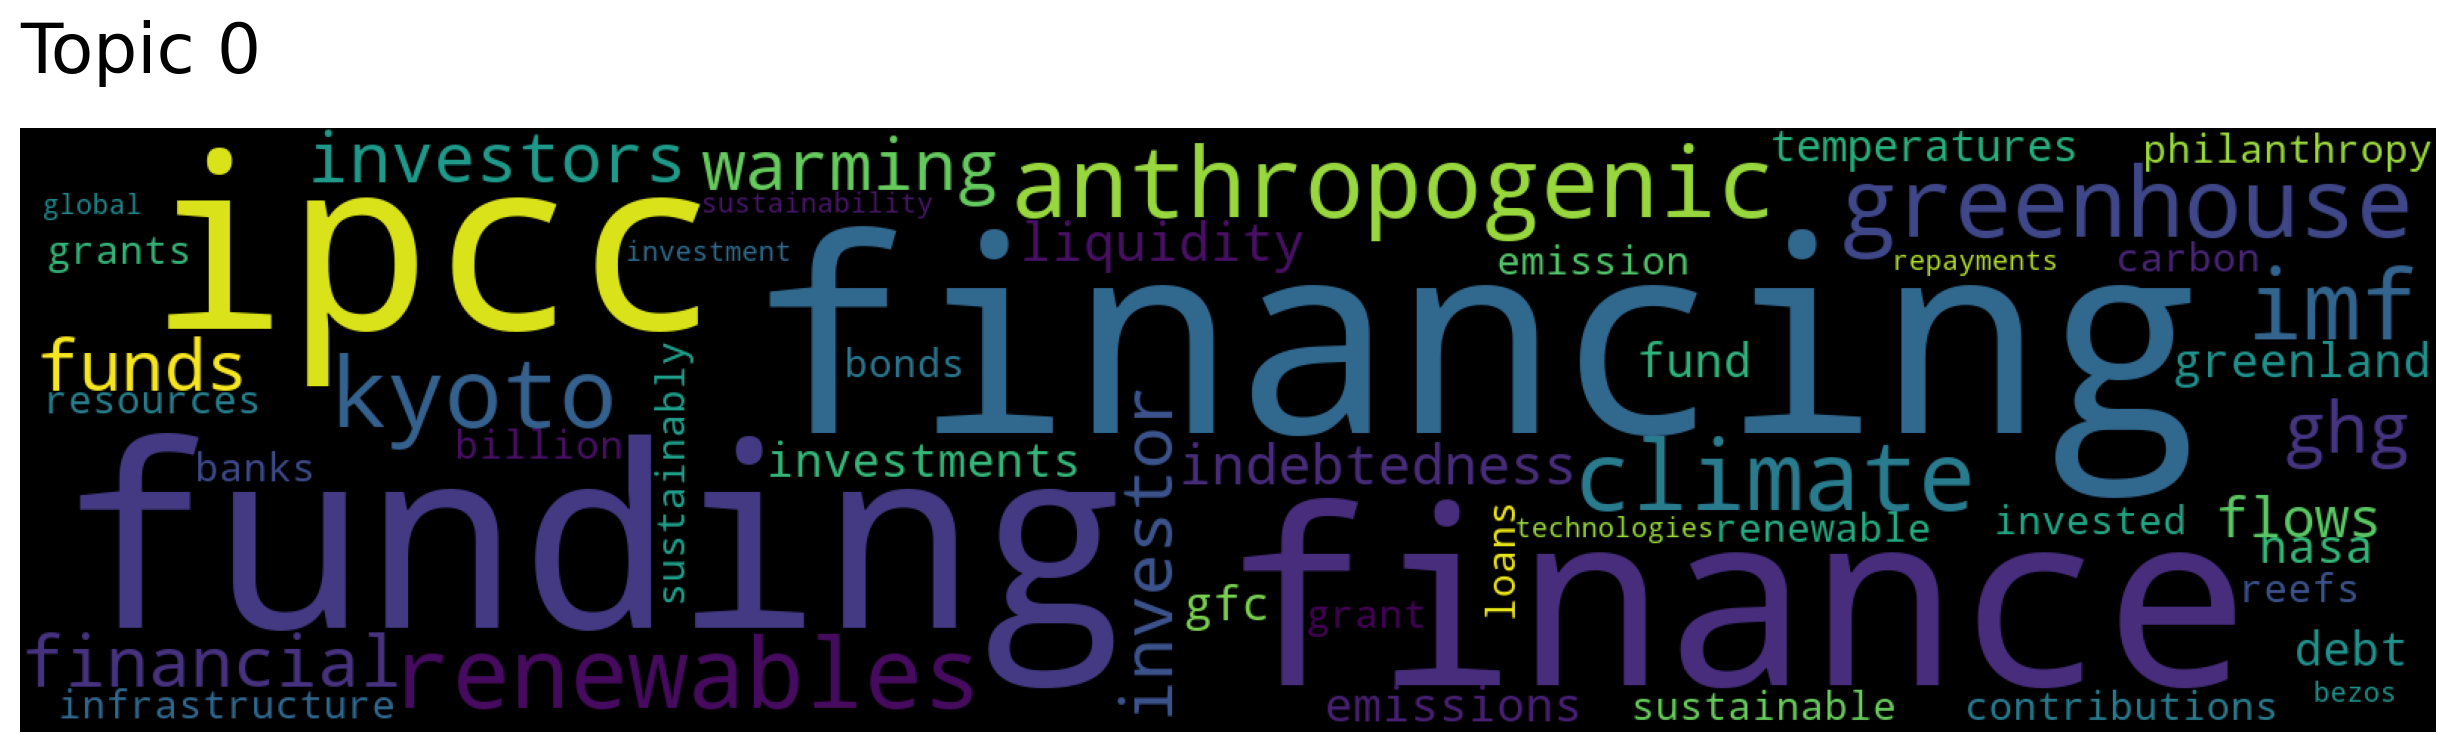

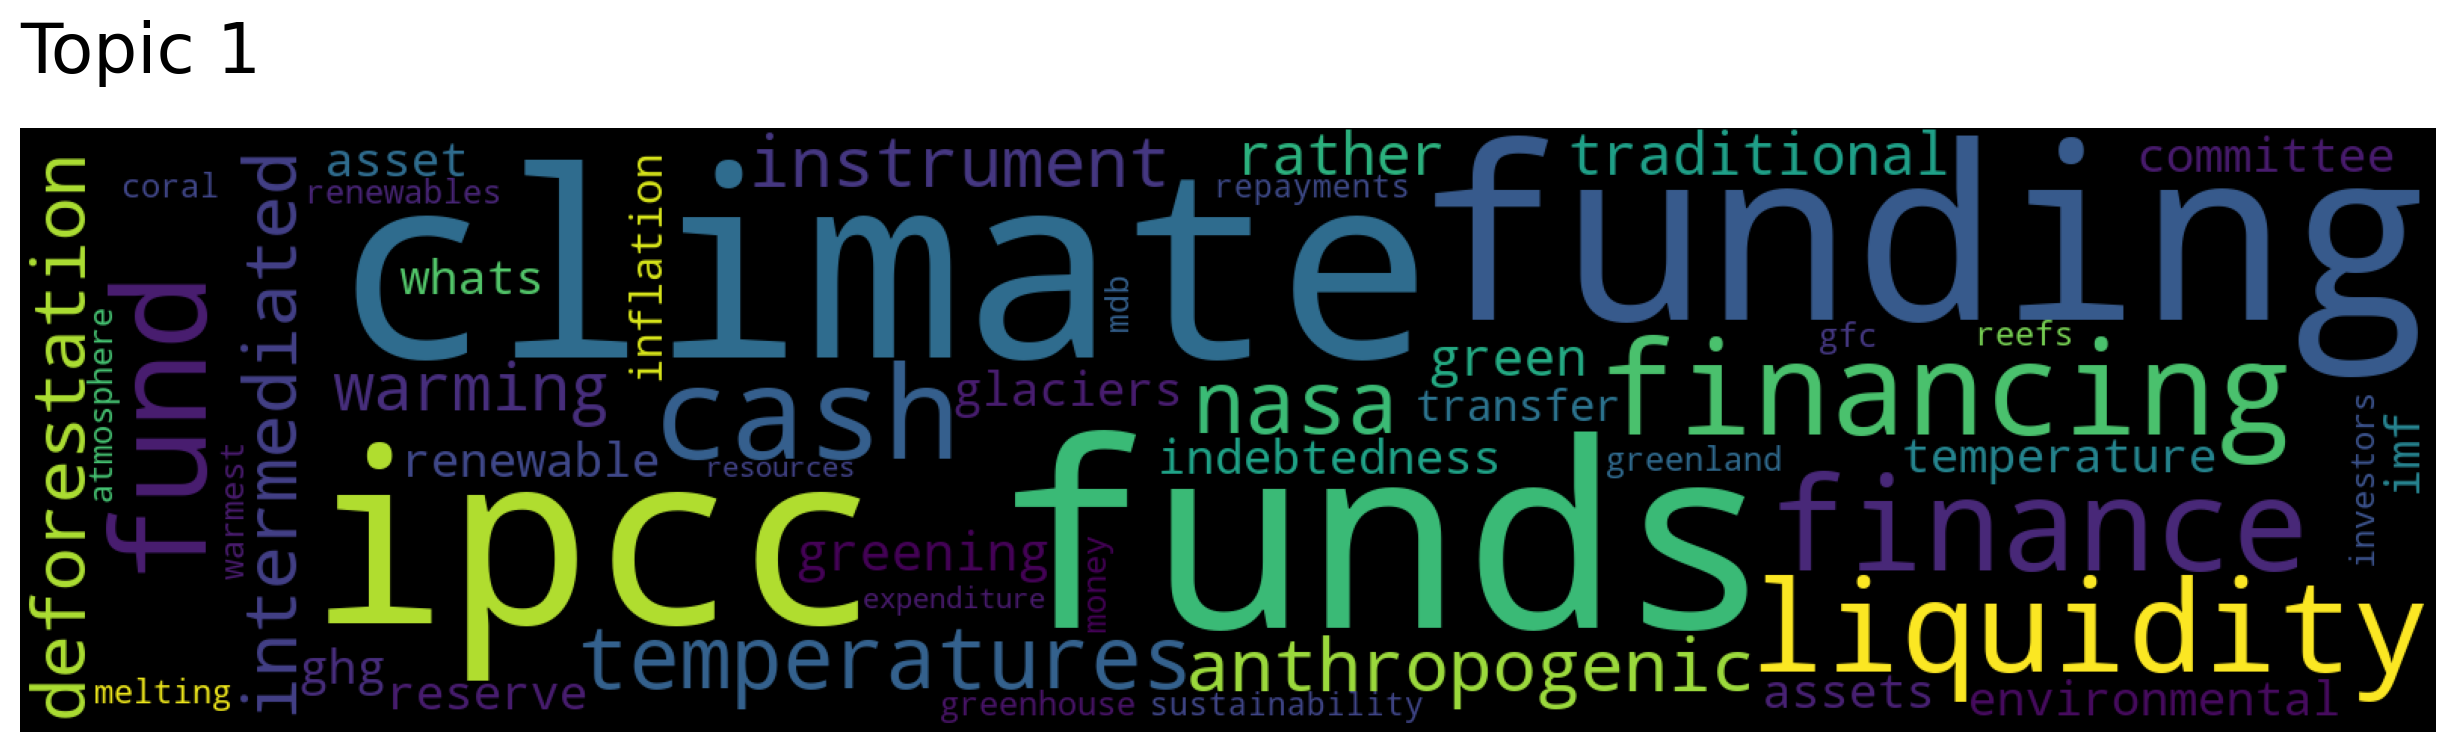

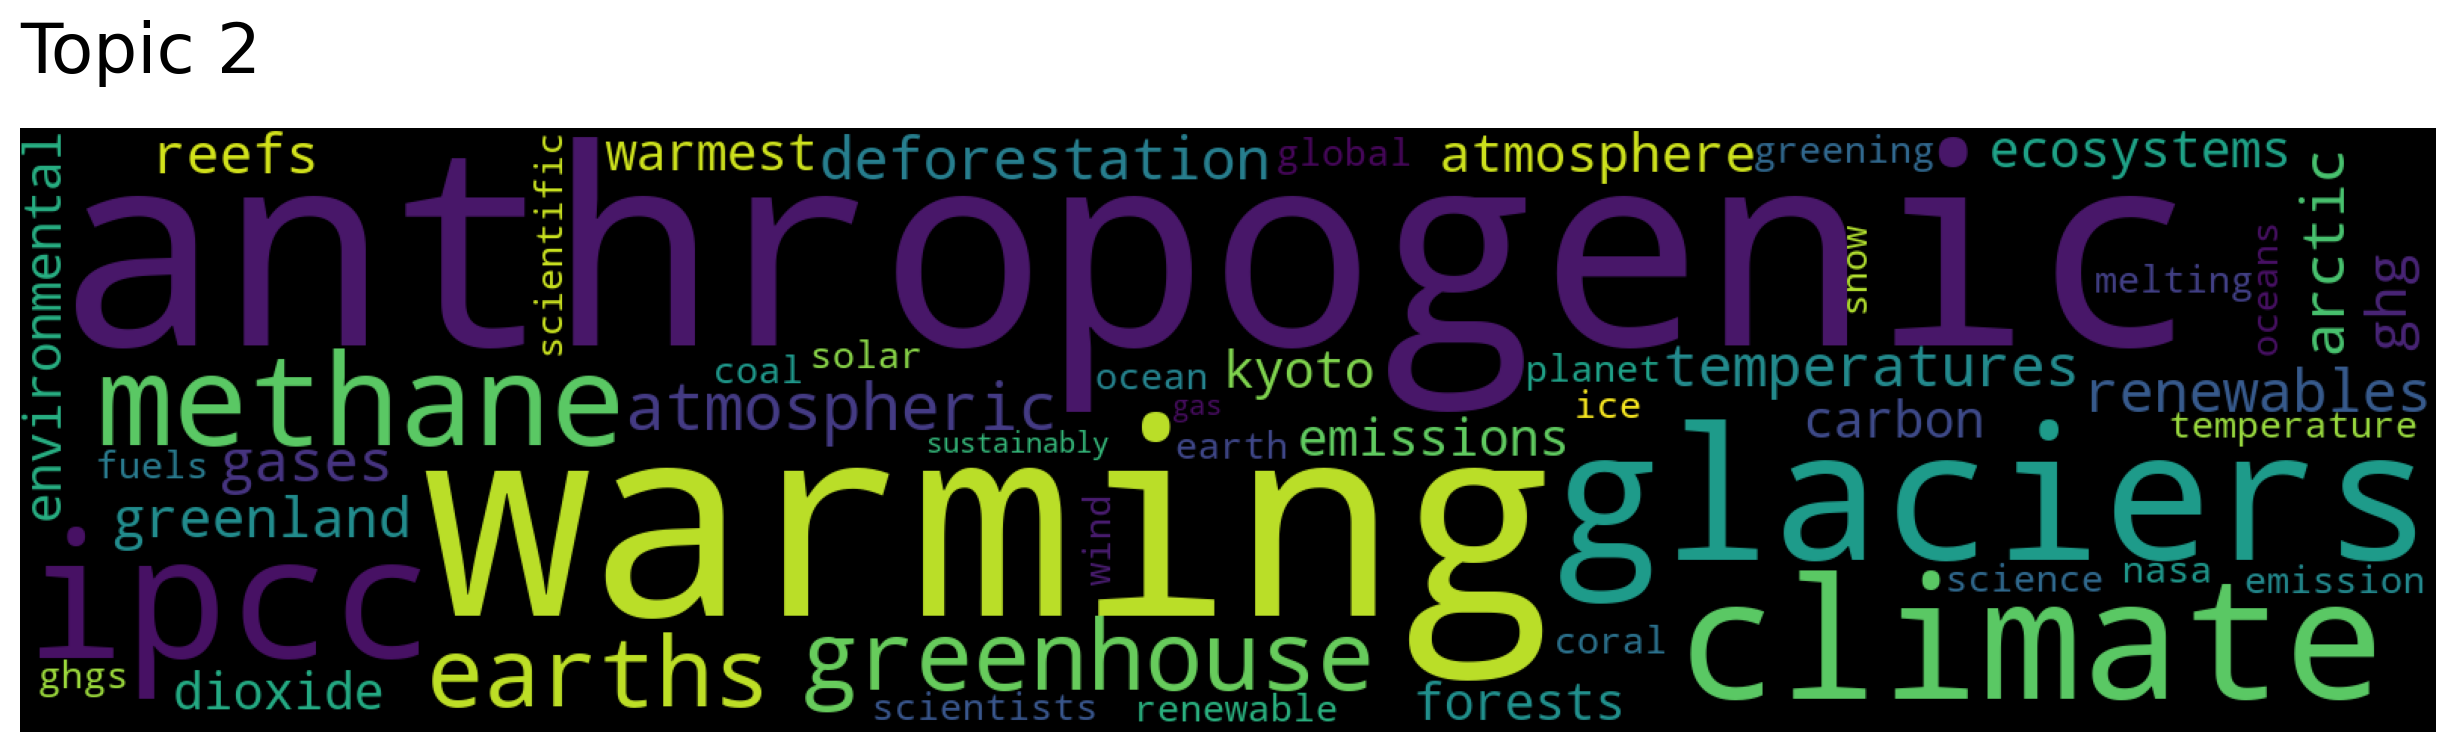

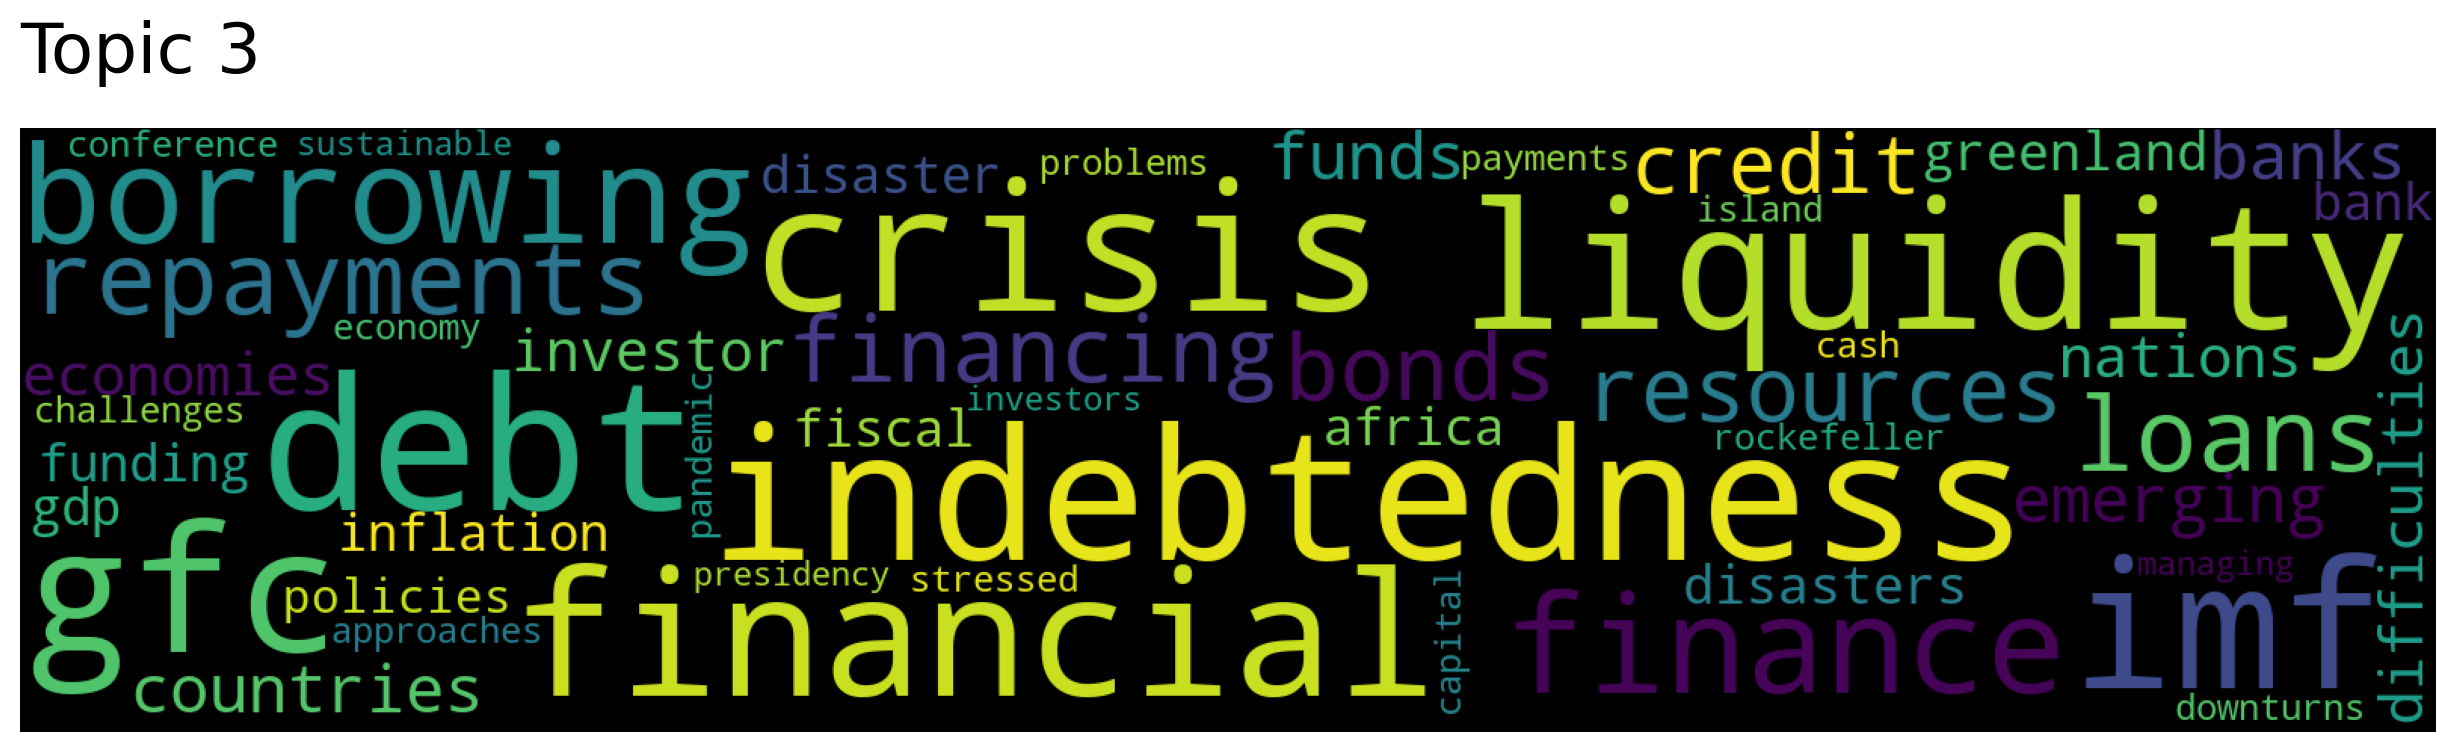

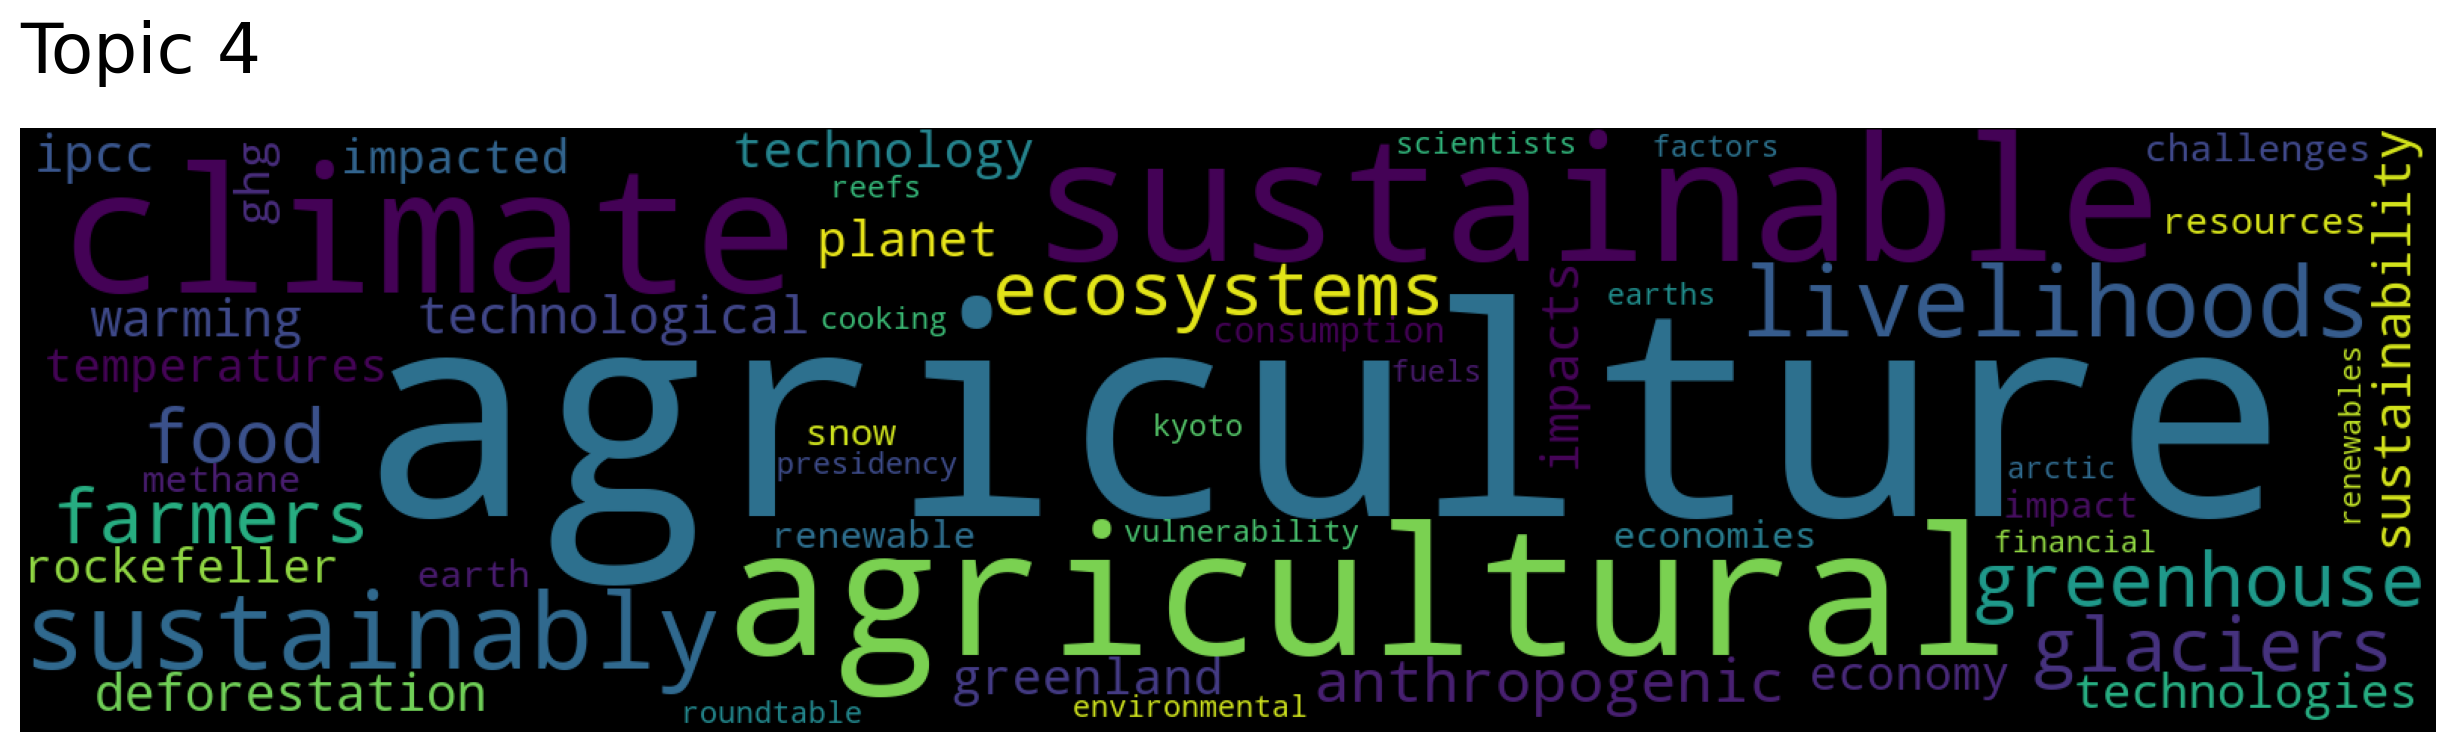

In [ ]:
for i in range( m.get_num_topics() ):
    m.generate_topic_wordcloud( i )